In [14]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import gmaps
import os
import time
import datetime as dt
from scipy.stats import linregress
import polyline
%matplotlib inline
import gmaps.datasets
import seaborn as sns
import folium
from folium import Choropleth
from folium.plugins import HeatMap



# Import API key
from api_keys import g_key



In [15]:
# Creates lists for data to be stored 
date = []
place = []
mag = []
cdi = []
mmi = []
coordinates = []
lat = []
long = []

#Output data 
output_file = "../Data/earthquake.csv"

def earthquake(e):
    params = {"starttime": "1800-01-01", 
              "minmagnitude": "4.0", "maxradiuskm":600, "latitude": 34.21, "longitude":-118.57}
    data = requests.get(e, params = params)
    data = json.loads(data.text)
    return data

e = r"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson"
a = earthquake(e)

for i in (a["features"]):
    print(i["properties"]["time"], i["properties"]["place"],
    i["properties"]["cdi"], i["properties"]["mag"],i["properties"]["mmi"],i["geometry"]["coordinates"][0],i["geometry"]["coordinates"][1])

1643564786970 5km WSW of Palomar Observatory, CA 4.6 4 4.328 -116.9146667 33.3355
1642891211845 25 km SW of Mina, Nevada 3.4 4.3 4.397 -118.3528 38.2571
1641428887010 8km ESE of Deep Springs, CA 4.6 4.75 5.384 -117.9023333 37.3338333
1641367274365 35 km SE of Mina, Nevada 3.8 4.2 4.608 -117.8238 38.1677
1635205355860 18km NW of San Simeon, CA 3.8 4.65 4.656 -121.3043333 35.7758333
1634795380460 112km SSE of Estacion Coahuila, B.C., MX None 4 None -114.3585 31.3518333
1632763240096 68 km ESE of San Felipe, Mexico None 4.4 None -114.1506 30.8654
1631933914700 2km E of Carson, CA 5.2 4.28 5.585 -118.2636667 33.8313333
1630426196600 6km NW of Pinnacles, CA 4.2 4.05 4.612 -121.1828333 36.5781667
1630067691160 13km SE of Bodfish, CA 4.1 4 4.676 -118.3791667 35.5151667
1630039664690 25km SSW of Smith Valley, NV 3.6 4.37 3.897 -119.4211667 38.5663333
1629730643620 12km N of Westmorland, CA 3.1 4.04 4.214 -115.6413333 33.139
1625807435790 28km SE of Markleeville, CA 4.8 4.34 5.001 -119.5293333 

1562384019450 15km WSW of Searles Valley, CA None 4.01 4.065 -117.5613333 35.726
1562384000200 17km E of Ridgecrest, CA None 4.08 4.173 -117.4861667 35.624
1562383966660 17km ESE of Little Lake, CA 1 4.17 4.725 -117.7303333 35.8903333
1562383825050 23km S of Trona, CA 1 4.49 5.56 -117.3581667 35.5566667
1562383772080 18km ESE of Little Lake, CA 2.7 4.51 5.9 -117.7115 35.9028333
1562383768840 10km WSW of Searles Valley, CA None 4.07 4.411 -117.5088333 35.7325
1562383755860 24km ESE of Little Lake, CA None 4.01 3.857 -117.6526667 35.8656667
1562383750290 13km SSW of Searles Valley, CA None 4.02 4.71 -117.4465 35.6566667
1562383726550 17km ESE of Little Lake, CA 0 4.19 4.788 -117.7221667 35.9025
1562383692340 24km WNW of Searles Valley, CA None 4.09 4.17 -117.6598333 35.8411667
1562383680730 16km E of Little Lake, CA 1 4.09 5.91 -117.7316667 35.9106667
1562383656260 20km ESE of Little Lake, CA None 4.03 4.268 -117.6975 35.8895
1562383631370 24km ESE of Ridgecrest, CA None 4.57 5.751 -117.

1421760096970 27 km ENE of Greenfield, California 3.9 4.43 4.9 -120.971 36.4333333
1421693768000 27 km SSE of Golfo de Santa Clara, Mexico None 4.2 None -114.398 31.4533
1420341489480 14km N of Castaic, CA 3.8 4.25 5.38 -118.6301667 34.6173333
1419400311440 10km SW of Niland, CA 3.8 4.19 5.84 -115.6085 33.1851667
1416464809290 4 km S of San Juan Bautista, California 4.6 4.23 5.04 -121.5358333 36.806
1415608962850 19km SSW of San Clemente Is. (NW tip), CA 3.4 4.11 5.3 -118.6535 32.8666667
1411937113260 40 km SSW of South Dos Palos, California 5.2 4.43 4.69 -120.8336667 36.6255
1410991985000 74 km SE of San Felipe, Mexico None 4.1 None -114.237 30.5947
1410886274100 69 km SE of San Felipe, Mexico None 4.4 None -114.2705 30.6287
1410818473120 Baja California, Mexico None 4.6 None -114.2865 30.5637
1410806405650 72 km SE of San Felipe, Mexico None 4.7 None -114.2304 30.6303
1410806236550 61 km SSW of Puerto Peñasco, Mexico None 4.5 None -113.8574 30.8316
1410805640610 86 km SE of San Felip

1296000688000 56 km ENE of Licenciado Gustavo Díaz Ordaz, Mexico None 4.5 None -115.653 31.236
1295765244550 14km W of Alberto Oviedo Mota, B.C., MX 5.3 4.15 None -115.3213333 32.2165
1295762129600 52 km ENE of Licenciado Gustavo Díaz Ordaz, Mexico None 4.1 None -115.69 31.226
1295760599800 51 km ENE of Licenciado Gustavo Díaz Ordaz, Mexico 3.4 4.3 None -115.7 31.217
1295752508200 54 km ENE of Licenciado Gustavo Díaz Ordaz, Mexico None 4.1 None -115.667 31.235
1295717365685 21 km E of Hawthorne, NV 2.3 4.2 None -118.3814 38.5374
1294822263680 9 km SSE of San Juan Bautista, California 4.6 4.5 4.42 -121.4963333 36.7711667
1294445416740 15 km E of Seven Trees, California 4.4 4.1 4.16 -121.6581667 37.2871667
1294435161300 108km ESE of Maneadero, B.C., MX None 4.04 None -115.5676667 31.258
1294435042990 109km ESE of Maneadero, B.C., MX None 4.05 None -115.5648333 31.242
1293107855020 14km S of Progreso, B.C., MX 4.6 4.31 None -115.5636667 32.4533333
1292655882870 17km ESE of Ocotillo, CA 3.

1270424577820 8km SSW of Estacion Coahuila, B.C., MX None 4.13 None -115.0258333 32.1295
1270424253490 13km S of Progreso, B.C., MX None 4.7 6.29 -115.5978333 32.4623333
1270424253480 13 km S of Progreso, Mexico None 4.5 None -115.597 32.462
1270424068290 17km W of Progreso, B.C., MX None 4.12 None -115.761 32.6025
1270423992180 18km WSW of Delta, B.C., MX None 4.39 None -115.3678333 32.2853333
1270423599410 22km SSW of Progreso, B.C., MX None 4.43 None -115.6555 32.3935
1270423507190 12km WNW of Alberto Oviedo Mota, B.C., MX None 5.38 7.11 -115.2925 32.2661667
1270423241610 13km SSW of Alberto Oviedo Mota, B.C., MX None 4.39 None -115.219 32.12
1270423033080 11km W of Alberto Oviedo Mota, B.C., MX None 4.56 6.03 -115.2906667 32.2211667
1270422914240 9km SW of Delta, B.C., MX None 5.43 7.14 -115.2595 32.3
1270422580110 16km W of Alberto Oviedo Mota, B.C., MX None 4.79 5.9 -115.3328333 32.204
1270421653970 18km SSE of Progreso, B.C., MX None 4.03 5.55 -115.4973333 32.436
1270421417120 1

1148444426010 6km SSW of Delta, B.C., MX 4.2 5.37 6.68 -115.2278333 32.3066667
1146810979124 34 km SSW of Hawthorne, Nevada None 4.3 None -118.7567 38.2284
1146517482600 103 km SSE of San Felipe, Mexico None 5.1 None -114.332 30.199
1144372014940 11 km WSW of Oak Shores, California 4.5 4.2 3.92 -121.0933333 35.7251667
1143894359780 23 km ENE of Soledad, California 5.9 4.34 5.05 -121.0935 36.5195
1143596183010 8km E of Ridgecrest, CA 4.3 4.11 None -117.5875 35.6218333
1140112079650 30 km E of Lee Vining, California 3.3 4.1 3.66 -118.7735 37.9848333
1133596174590 8km N of Big Bear City, CA 4.3 4.17 None -116.8331667 34.329
1129711886010 40km SSE of San Clemente Is. (SE tip), CA 3 4.26 None -118.145 32.4966667
1129620663470 11km N of Cabazon, CA 3.9 4.42 None -116.7755 34.0121667
1129608521520 11km N of Cabazon, CA 3.8 4.1 None -116.7753333 34.0141667
1129497095010 44km SSE of San Clemente Is. (SE tip), CA 3.8 4.99 3.24 -118.1633333 32.4545
1128260889410 8 km E of San Simeon, California 4

1000079958040 2km SE of Beverly Hills, CA 5.6 4.24 5.481 -118.3885 34.059
998802182450 3 km S of San Juan Bautista, California 3.7 4 4.11 -121.5308333 36.8116667
997999587870 10km SSE of San Clemente Is. (SE tip), CA 5 4.17 3.08 -118.3176667 32.7341667
997985073770 9km SE of San Clemente Is. (SE tip), CA 4.1 4.36 3.52 -118.2881667 32.7595
996282569110 7km ENE of Coso Junction, CA None 4.01 None -117.8715 36.0581667
995633587530 7km NNE of Little Lake, CA None 4.43 None -117.8771667 35.995
995374799170 7km ESE of Coso Junction, CA 3.8 4.93 6.11 -117.8823333 36.017
995372718950 7km E of Coso Junction, CA None 4.07 None -117.8721667 36.043
995371646100 7km ESE of Coso Junction, CA 3.9 5.17 6.5 -117.8743333 36.0163333
994187236260 10 km S of Tres Pinos, California 4.1 4 3.78 -121.3236667 36.6921667
994186970790 10 km S of Tres Pinos, California None 4.1 3.7 -121.3281667 36.6946667
994095233680 10 km S of Tres Pinos, California 3.6 4.1 4.11 -121.3283333 36.6953333
990140205850 20km SW of Li

923466400120 22km SW of Ocotillo, California None 4.07 None -116.162 32.594
922214200410 12 km S of Tres Pinos, California None 4 None -121.2993333 36.6755
921331880340 23km SW of Ocotillo, California None 4.27 None -116.165 32.584
920042756750 7 km NW of Parkfield, California None 4 None -120.4916667 35.9455
919615800070 44 km ENE of Camalú, Mexico None 4 None -115.656 31.045
919393712290 22km SW of Ocotillo, California None 4.24 None -116.161 32.591
917433863300 39 km NW of Indian Springs, Nevada None 4.8 None -115.989 36.816
917290326130 37 km NW of Indian Springs, Nevada None 4.4 None -115.959 36.817
916649316710 16 km SSE of Tres Pinos, California None 4.2 None -121.2678333 36.6461667
916233655910 7km ESE of Ocotillo, California None 4.38 None -115.925 32.711
914890806540 28 km NW of Rachel, Nevada None 4.1 None -115.973 37.825
913614849500 9 km WSW of Aspen Springs, California None 4.03 None -118.8105 37.5296667
913426892000 50 km WSW of Rachel, Nevada None 4.1 None -116.29 37.51

796238371920 44 km SSE of Golfo de Santa Clara, Mexico None 4.2 None -114.371 31.303
796228326410 48 km SSE of Golfo de Santa Clara, Mexico None 4.2 None -114.351 31.265
794371727400 11 km WNW of Aspen Springs, California None 4 None -118.8336667 37.5911667
794362023100 11 km WNW of Aspen Springs, California None 4.2 None -118.834 37.5956667
793229058070 11km WNW of Malibu, California None 4.34 None -118.915 34.049
793138631240 8 km ESE of Mesa Vista, California None 4 None -119.7086667 38.7796667
791395350530 49km SW of Primo Tapia, B.C., MX None 4.25 None -117.2356667 31.8693333
789351122730 7 km ESE of Alpine Village, California None 4.4 None -119.7368333 38.7578333
787989011860 7 km NE of Markleeville, California None 4 None -119.7186667 38.737
787919267180 3 km NW of Parkfield, California None 4.9 None -120.4646667 35.9176667
787344179730 86 km SSW of Puerto Peñasco, Mexico None 4.1 None -113.878 30.593
786685714490 3km NW of Lake View Terrace, California None 4.54 None -118.389 3

722814077230 11km NE of Barstow, California None 4 None -116.952 34.979
722659224870 17km NNE of Barstow, California None 4.11 None -116.977 35.045
719720739820 10 km NNW of Smith, Nevada None 4.1 None -119.37 38.889
719558888920 4 km NW of Parkfield, California None 4.36 None -120.474 35.9283333
718807092440 21km ENE of Barstow, California None 4.52 None -116.797 34.944
718739692200 21 km NNW of Benton, California None 4.1 None -118.58 37.993
718010397340 35km ENE of Lucerne Valley, California None 4.59 None -116.636 34.601
717613154160 1 km ESE of Kettleman City, California None 4.2 None -119.9433333 36.003
717260640000 57 km NNW of Indian Springs, Nevada None 4.4 None -115.988 37.021
717187953340 17km SSW of Fort Irwin, California None 4.06 None -116.724 35.113
716835600010 59 km NE of Beatty, Nevada None 4.4 None -116.21 37.207
716624073680 2 km ESE of Kettleman City, California None 4.38 None -119.9403333 35.9966667
716546831300 9km SE of Yucca Valley, California None 5.26 None -1

709744634010 15km SSE of Big Bear Lake, CA None 4.66 None -116.8751667 34.1111667
709744630390 10km SSE of Big Bear Lake, California None 4 None -116.86 34.1698333
709743930730 7km SSE of Big Bear City, CA 8.7 6.3 7.996 -116.827 34.203
709743891500 12km S of Big Bear City, CA None 4.54 None -116.8246667 34.1595
709742601850 11km SSE of Big Bear Lake, California None 5.53 6.682 -116.852 34.162
709742346910 3km SSE of Yucca Valley, California None 4.35 None -116.425 34.089
709741742390 35km ENE of Lucerne Valley, California None 4.03 None -116.642 34.61
709740568820 9km NW of Morongo Valley, California None 4.14 None -116.646 34.111
709739503270 5km NW of Yucca Valley, California None 4 None -116.471 34.1396667
709739446160 3km ESE of Yucca Valley, California None 4.95 None -116.403 34.109
709739416340 7km SW of Joshua Tree, CA None 4.22 None -116.3566667 34.084
709738855840 7km NNW of Yucca Valley, CA None 4.17 None -116.4513333 34.1778333
709738101600 16km NNW of Furnace Creek, Califor

629965624510 15km NE of Thermal, CA None 4.14 None -116.024 33.734
629132400090 47 km NE of Beatty, Nevada None 5.5 None -116.409 37.231
628643807860 11km SSW of Idyllwild, CA None 4.42 None -116.742 33.646
628519063190 Central California None 4.4 None -121.3216667 36.6906667
626832879690 67 km SW of Puerto Peñasco, Mexico None 4.5 None -114.015 30.871
626485357270 2 km W of Monte Sereno, California None 4.2 None -122.0238333 37.2353333
626276253880 4 km NW of Day Valley, California None 4.2 None -121.8883333 37.0658333
626232641910 6 km NW of Day Valley, California None 4 None -121.9106667 37.0763333
626123341390 8 km WSW of Topaz, California None 4.6 None -119.6166667 38.5973333
625989010690 6 km NE of Day Valley, California None 4.7 None -121.8031667 37.0698333
625851000090 46 km NNE of Beatty, Nevada None 5.7 None -116.491 37.263
625749433370 6 km NE of Day Valley, California None 4 None -121.8053333 37.0715
625356109370 1 km N of Corralitos, California None 4 None -121.8038333 37.

564759279920 17km SW of Westmorland, CA None 4.71 None -115.764 32.942
564759235800 20km SSE of Salton City, CA None 4.34 None -115.875 33.13
564759180550 25km W of Westmorland, CA None 4.39 None -115.885 32.997
564758328930 18km W of Westmorland, CA None 4.17 None -115.815 33.014
564758156710 22km W of Westmorland, CA None 6.6 8.352 -115.852 33.015
564720780740 18km W of Westmorland, CA None 4.66 None -115.812 33.04
564718607090 17km W of Westmorland, CA None 4.08 None -115.8 33.05
564718523170 16km W of Westmorland, CA None 4.82 None -115.798 33.048
564718475450 18km W of Westmorland, CA None 4.54 None -115.82 33.036
564717254660 17km WNW of Westmorland, CA None 6.2 7.895 -115.792 33.09
564717183160 16km WNW of Westmorland, CA None 4.03 None -115.782 33.072
564715968100 15km WNW of Westmorland, CA None 4.18 None -115.781 33.067
563295960910 21 km NNE of Soledad, California None 4 None -121.2015 36.5941667
562294498200 70 km W of Las Brisas, Mexico None 4.5 None -116.89 30.87
56211831

521531127510 9km SW of Morongo Valley, CA None 4.05 None -116.652 33.986
521251952140 6km WNW of Desert Hot Springs, CA None 4.11 None -116.567 33.976
521235380080 5km SW of Morongo Valley, CA None 4.07 None -116.615 34.016
521202159440 5km WSW of Morongo Valley, CA None 4.3 None -116.627 34.028
521201342900 7km WNW of Desert Hot Springs, CA None 4.29 None -116.579 33.977
521198652790 7km WSW of Morongo Valley, CA None 4.2 None -116.654 34.032
521198444560 6km SSW of Morongo Valley, CA 8 6 7.241 -116.608 33.999
521167222200 24 km SSW of Big Sur, California None 4.4 None -121.874 36.0531667
520115265100 45 km NNE of Beatty, Nevada None 5.5 None -116.499 37.265
520002782300 10km SSE of Alberto Oviedo Mota, B.C., MX None 4.28 None -115.109 32.149
518369051230 60 km SSW of Rachel, Nevada None 4.2 None -115.998 37.137
518367840060 65 km SSW of Rachel, Nevada None 5.3 None -116.016 37.098
517913275590 18 km SSE of Tres Pinos, California None 4.7 None -121.2496667 36.6373333
514860101650 76 k

440447400090 63 km SSW of Rachel, Nevada None 5.1 None -116.072 37.14
439833599230 56 km NNW of Indian Springs, Nevada None 4 None -115.975 37.021
438213755720 10 km NW of Coalinga, California None 4.06 None -120.4401667 36.2126667
435624253530 20km NNE of Kernville, CA None 4.52 None -118.333 35.92
433786440360 9 km W of Aspen Springs, California None 4.8 None -118.8195 37.5563333
433090800120 65 km SSW of Rachel, Nevada None 4.1 None -116.049 37.106
433009499720 64 km SSW of Rachel, Nevada None 4.2 None -116.043 37.113
433004400090 59 km NE of Beatty, Nevada None 4.1 None -116.209 37.21
432327801560 71 km S of Eureka, Nevada None 4.2 None -116.017 38.867
432128886540 11 km NNW of Coalinga, California None 4.76 None -120.3871667 36.2371667
432057732020 5 km S of Swall Meadows, California None 4 None -118.6381667 37.457
431947291800 12 km NNE of Coalinga, California None 4.09 None -120.2853333 36.2321667
431946973510 11 km NE of Coalinga, California None 5.47 None -120.2796667 36.21983

387914400090 58 km NNW of Indian Springs, Nevada None 4.5 None -116.01 37.017
387755528600 24 km N of Benton, California None 4.5 None -118.502 38.035
387543732360 16km WNW of Malibu, CA None 4.01 None -118.97 34.063
385635640030 11km NNW of Ocotillo Wells, CA None 4.07 None -116.169 33.24
385635208500 12km SSW of Ocotillo Wells, CA None 4.48 None -116.204 33.052
384731137240 17km S of Searles Valley, CA None 4 None -117.433 35.613
384382260660 12km NNE of Inyokern, CA None 4.62 None -117.766 35.747
384382212940 14km NNE of Inyokern, CA None 4.32 None -117.733 35.76
383800222670 13km NE of Inyokern, CA None 4.02 None -117.724 35.742
382375500090 60 km WSW of Rachel, Nevada None 5.6 None -116.316 37.348
382373700080 43 km NE of Beatty, Nevada None 5.4 None -116.463 37.224
381106262060 California-Nevada border region None 4.5 None -118.066 38.543
381106243620 25 km N of Mina, Nevada None 4.3 None -118.09 38.622
381081600100 66 km ENE of Beatty, Nevada None 5.9 None -116.051 37.091
380735

328615890610 California-Nevada border region None 4.2 None -118.8166667 37.5885
328608319280 9 km W of Aspen Springs, California None 4.1 None -118.8196667 37.5633333
328582697300 California-Nevada border region None 4.5 None -118.8481667 37.4961667
328549317740 11 km SE of Mammoth Lakes, California None 4 None -118.8905 37.5676667
328468860960 12 km WSW of Aspen Springs, California None 4.1 None -118.8395 37.5145
328467416420 15 km WSW of Aspen Springs, California None 4 None -118.8743333 37.5041667
328427743600 15 km WSW of Aspen Springs, California None 4 None -118.8735 37.5096667
328421932380 9 km W of Aspen Springs, California None 4.2 None -118.8161667 37.5461667
328419525720 26 km WSW of Guadalupe, California None 4.9 None -120.8473333 34.9071667
328362877380 13 km SW of Aspen Springs, California None 4.4 None -118.8156667 37.4666667
328342063010 California-Nevada border region None 4 None -118.9071667 37.584
328340903020 9 km ESE of Mammoth Lakes, California None 4.6 None -118.

307026304100 7 km ESE of Mammoth Lakes, California None 4.1 None -118.896 37.6266667
305545427830 6 km ESE of Mammoth Lakes, California None 4.1 None -118.9075 37.6228333
305478000100 65 km ENE of Beatty, Nevada None 5.8 None -116.053 37.088
304787280200 64 km SSW of Rachel, Nevada None 4.7 None -116.066 37.121
303416609110 64km NNE of Caliente, NV None 4.14 None -114.3105 38.1628333
303030200490 9 km E of Gilroy, California None 4.2 None -121.4583333 37.0128333
302972400100 57 km NNW of Indian Springs, Nevada None 4.8 None -116.008 37.015
302826835650 8 km E of Gilroy, California None 4.3 None -121.477 36.9961667
302826816460 6km NNE of Mountain House, CA None 4.31 None -121.5105 37.8326667
302807122930 8 km ENE of San Martin, California None 5.8 7 -121.5123333 37.1038333
302540850200 64 km ENE of Beatty, Nevada None 4.5 None -116.07 37.083
300680763420 16km N of Yucca Valley, CA None 4 None -116.4235 34.258
299574232890 2km ENE of Big Bear Lake, CA None 4.36 None -116.8886667 34.2478

205090258950 16 km NW of Parkfield, California None 4.05 None -120.5643333 36.0005
203488740640 75km SSW of Alberto Oviedo Mota, B.C., MX None 4.11 None -115.559 31.642
202955833100 50 km ENE of Furnace Creek, California None 4 None -116.328 36.604
202955558600 45 km ENE of Furnace Creek, California None 4.1 None -116.366 36.577
201721179280 13 km WSW of Three Rocks, California None 4.6 None -120.5395 36.4745
201137100000 141km SSW of Maneadero, B.C., MX None 4.03 None -117 30.5
200778600200 58 km NE of Beatty, Nevada None 4.9 None -116.212 37.209
200280129930 32km WSW of Alberto Oviedo Mota, B.C., MX None 4.07 None -115.502 32.149
198522450900 28 km W of Three Rocks, California None 4.16 None -120.7023333 36.542
198314707620 42km ENE of Maneadero, B.C., MX None 4.18 None -116.171 31.883
197824897990 11km NNE of Simi Valley, CA None 4.47 4.344 -118.673 34.358
196397286100 53 km NNE of Beatty, Nevada None 4.4 None -116.464 37.326
196150984900 49 km N of Beatty, Nevada None 4 None -116.6

134757451420 22 km NE of Soledad, California None 4.23 None -121.185 36.5883333
134677728190 2 km E of San Ardo, California None 4.14 None -120.8815 36.0186667
134604452270 24 km NE of Soledad, California None 4.35 None -121.1026667 36.5578333
134563660460 21 km NE of Soledad, California None 4.31 None -121.1576667 36.5663333
134390570160 28km SW of Ludlow, CA None 4.05 None -116.394 34.5521667
132526797200 3 km SE of Peeples Valley, Arizona None 4.1 None -112.699 34.245
132022471630 12km ESE of Santa Clarita, CA None 4.37 None -118.3848333 34.386
131216400100 65 km SSW of Rachel, Nevada None 5.8 None -116.053 37.104
131125503450 19 km NW of Parkfield, California None 4.23 None -120.588 36.0266667
130589716100 23 km SE of Tres Pinos, California None 4.16 None -121.1653333 36.6248333
130047602150 8 km SW of Tres Pinos, California None 4.28 None -121.384 36.73
130038556570 8 km SW of Tres Pinos, California None 4.14 None -121.3833333 36.7305
129724060500 21 km NE of Soledad, California N

34956113040 10km SSW of Agua Dulce, CA None 4.5 None -118.37 34.416
34956100080 10km SSW of Agua Dulce, CA None 4.1 None -118.37 34.416
34956096840 10km SSW of Agua Dulce, CA None 4.2 None -118.37 34.416
34956072450 10km SSW of Agua Dulce, CA None 5.8 7.16 -118.37 34.416
34956041920 10km SSW of Agua Dulce, CA 8.7 6.6 8.691 -118.37 34.416
31410289430 16km W of Searles Valley, CA None 4.28 None -117.5776667 35.7603333
30382200720 65km ENE of Beatty, NV None 4.49 None -116.0988333 37.1731667
30297899260 69km ENE of Beatty, NV None 5.19 None -116.034 37.1428333
30211200490 70km ENE of Beatty, NV None 4.66 None -116.0078333 37.1001667
26665200360 67km ENE of Beatty, NV None 4.44 None -116.0118333 37.0295
24762600350 69km ENE of Beatty, NV None 4.93 None -116.0051667 37.0706667
24678296280 44km W of Alamo, NV None 4.07 None -115.6661667 37.3606667
22049268830 4km W of Lytle Creek, CA None 4.21 None -117.5383333 34.2601667
21997853000 3km W of Lytle Creek, CA None 5.22 5.2 -117.5343333 34.254

-54595861610 5km NNE of Ocotillo Wells, CA None 6.6 8.722 -116.103 33.1798333
-55564707000 10km S of Twentynine Palms, CA None 4.13 None -116.0803333 34.0461667
-55833332370 73km E of Beatty, NV None 4.2 None -115.9311667 36.8716667
-56105999300 61km NE of Beatty, NV None 4.92 None -116.3106667 37.3326667
-57999089620 57km ENE of Beatty, NV None 4.58 None -116.2113333 37.1846667
-58696199530 66km ENE of Beatty, NV None 4.91 None -116.0536667 37.1165
-60034309810 72km SE of Hawthorne, NV None 4.28 None -118.118 38.0155
-60045502660 70km NNE of Dixon Lane-Meadow Creek, CA None 5 None -118.1796667 37.9835
-61549200260 73km ENE of Beatty, NV None 4.3 None -116.0538333 37.2563333
-63159105400 9km SW of Parkfield, CA None 4.2 None -120.4976667 35.8338333
-64305328000 2 km NE of Corralitos, California None 4.66 None -121.788 37.01
-64573198440 68km ENE of Beatty, NV None 4.02 None -116.002 37.0366667
-66680976910 15km NE of Dixon Lane-Meadow Creek, CA None 4.17 None -118.2813333 37.4643333
-6

-138954989190 65km E of Beatty, NV None 4.32 None -116.0398333 37.0176667
-139830919150 8km SW of Salton City, CA None 4.21 None -116.0018333 33.2428333
-140165999080 67km ENE of Beatty, NV None 4.93 None -116.033 37.0978333
-140804017650 11km NE of Valencia, CA None 4.09 None -118.4845 34.5185
-143254901350 145km ESE of Fortuna Foothills, AZ None 4.14 None -113.06 32.036
-143309815130 5km NNW of Brawley, CA None 4.1 None -115.5541667 33.0185
-143309988060 4km ENE of Westmorland, CA None 4.14 None -115.5803333 33.0581667
-143310578870 8km N of Westmorland, CA None 4.36 None -115.6206667 33.1091667
-143364598920 68km N of Pahrump, NV None 4.3 None -115.9561667 36.818
-143414273670 5km N of Westmorland, CA None 4.3 None -115.6221667 33.0793333
-144487739020 35km SE of Smith Valley, NV None 4.16 None -119.0341667 38.5813333
-144488014820 39km SSE of Smith Valley, NV None 4.48 None -119.1051667 38.49
-145623067520 69km ENE of Beatty, NV None 4.41 None -116.0276667 37.1185
-146212043250 68k

-258689839750 3km SE of Huntington Beach, CA None 4.1 None -117.9796667 33.673
-258695566120 4km SSE of Huntington Beach, CA None 4.12 None -117.9805 33.6661667
-258696609820 3km SSE of Huntington Beach, CA None 4.58 None -117.984 33.671
-258835815480 13km SE of Little Lake, CA None 5.13 None -117.7946667 35.8643333
-260141909110 7km SE of Yorba Linda, CA None 4.4 None -117.7536667 33.853
-261321838530 33km ENE of Ensenada, B.C., MX None 4.16 None -116.2955 31.9883333
-261341748830 11km SW of Ocotillo Wells, CA None 4.28 None -116.2195 33.0748333
-261634219210 18km SW of Ocotillo Wells, CA None 4.39 None -116.2451667 33.0088333
-261730799410 58km ENE of Beatty, NV None 4.2 None -116.2078333 37.1878333
-261981562000 7km S of Puebla, B.C., MX None 4.1 None -115.35 32.5
-261981670790 4km WNW of Heber, CA None 4.75 None -115.5698333 32.7415
-262940891000 10km NNW of Tehachapi, CA None 4.07 None -118.504 35.2121667
-263775552420 13km SW of Ocotillo Wells, CA None 4.69 None -116.2263333 33.0

-400295451140 19km N of Ocotillo, CA None 4.72 None -115.965 32.9023333
-400295545550 4km NNW of Brawley, CA None 4.06 None -115.5493333 33.0083333
-400296946750 11km SW of Salton City, CA None 5.05 None -116.0285 33.2226667
-400297093550 14km W of Westmorland, CA None 4.26 None -115.7715 33.0603333
-400298099090 10km NW of Westmorland, CA None 4.31 None -115.7 33.1
-400298543100 11km NNW of Westmorland, CA None 5.19 None -115.6808333 33.119
-401045377540 60km SE of Maneadero, B.C., MX None 4.02 None -116.17 31.2903333
-401076902850 16km E of Julian, CA None 4.08 None -116.428 33.0658333
-401605394050 48km SSW of Progreso, B.C., MX None 4.07 None -115.8128333 32.1915
-401619462350 59km E of Maneadero, B.C., MX None 4.03 None -115.9468333 31.8061667
-401641032280 63km WSW of Alberto Oviedo Mota, B.C., MX None 4.02 None -115.7951667 32.0271667
-402307789220 59km ESE of Maneadero, B.C., MX None 4.09 None -115.989 31.5253333
-402349033520 18km ENE of Thermal, CA None 4.13 None -115.9653333

-437765700000 87km SSW of Alberto Oviedo Mota, B.C., MX None 4.7 None -115.5 31.5
-437774580000 87km SSW of Alberto Oviedo Mota, B.C., MX None 4.5 None -115.5 31.5
-437784420000 87km SSW of Alberto Oviedo Mota, B.C., MX None 4.5 None -115.5 31.5
-437845651650 90km ESE of Maneadero, B.C., MX None 5.06 None -115.7025 31.374
-437854018380 106km ESE of Maneadero, B.C., MX None 4.94 None -115.5536667 31.3136667
-437869790030 91km ESE of Maneadero, B.C., MX None 4.57 None -115.6393333 31.4963333
-437893515860 82km S of Alberto Oviedo Mota, B.C., MX None 4.9 5.66 -115.3103333 31.5035
-437927340000 87km SSW of Alberto Oviedo Mota, B.C., MX None 4.5 None -115.5 31.5
-437930646460 86km SSW of Alberto Oviedo Mota, B.C., MX None 5.06 None -115.3578333 31.4731667
-437935932370 57km S of Alberto Oviedo Mota, B.C., MX None 5.21 6.35 -115.2528333 31.7213333
-437936160000 87km SSW of Alberto Oviedo Mota, B.C., MX None 4.6 None -115.5 31.5
-437937420000 87km SSW of Alberto Oviedo Mota, B.C., MX None 4.5

-476338893790 42km ESE of Maneadero, B.C., MX None 4.13 None -116.1325 31.6376667
-476531594750 46km E of Maneadero, B.C., MX None 4.41 None -116.083 31.658
-477190567850 14km NNE of Ojai, CA None 4.29 None -119.1835 34.562
-477230681340 24km ESE of Maneadero, B.C., MX None 4.73 5.44 -116.3386667 31.6265
-477246962690 17km NNE of Olancha, CA None 4.13 None -117.9061667 36.4168333
-477449661310 33km ESE of Maneadero, B.C., MX None 4.09 None -116.2288333 31.633
-477474923600 81km ESE of Maneadero, B.C., MX None 4.15 None -115.8511667 31.3161667
-477512618610 40km ESE of Maneadero, B.C., MX None 5.16 5.96 -116.1876667 31.5608333
-477524549130 37km E of Maneadero, B.C., MX None 4.02 None -116.1768333 31.6833333
-477529338840 30km E of Maneadero, B.C., MX None 4.62 5.33 -116.2525 31.6841667
-477560175970 40km ESE of Maneadero, B.C., MX None 4.27 None -116.1678333 31.6103333
-477582055050 43km S of Progreso, B.C., MX None 4.41 None -115.657 32.1996667
-477625114750 40km ESE of Maneadero, B.C

-540519959530 13km NNW of Grapevine, CA None 4.02 None -118.9796667 35.051
-540687884000 11 km ESE of Hawthorne, Nevada None 4.8 None -118.5 38.5
-540798455200 9km W of Grapevine, CA None 4.05 None -119.0303333 34.9446667
-540801472810 17km SW of Lamont, CA None 4.12 None -119.0268333 35.133
-541174642490 13km NW of Grapevine, CA None 4 None -119.0353333 35.0273333
-541177464990 14km NNE of Pine Mountain Club, CA None 4.53 5.16 -119.0995 34.9641667
-542699116760 18km N of Tehachapi, CA None 4.26 None -118.4798333 35.2911667
-543065873050 3km WNW of Grapevine, CA None 4.35 None -118.9656667 34.9523333
-543289164830 13km NNE of Lamont, CA None 4.02 None -118.8416667 35.3616667
-543662047800 181km WSW of Cambria, CA None 4.72 None -122.9338333 34.9635
-544236580230 24km SW of Bodfish, CA None 4.13 None -118.675 35.4313333
-544765119950 16km W of Tehachapi, CA None 4.04 None -118.6191667 35.1235
-544865904530 13km NNE of Grapevine, CA None 4.03 None -118.8891667 35.0558333
-545647133480 26

-550534088930 16km NNW of Tehachapi, CA None 4.45 None -118.4988333 35.2721667
-550534737530 2km WNW of Tehachapi, CA None 4.49 None -118.4668333 35.1416667
-550541191700 5km WNW of Grapevine, CA None 4.41 None -118.9795 34.9686667
-550547807090 23km ENE of Arvin, CA None 4.02 None -118.6126667 35.3181667
-550548411100 6km NW of Frazier Park, CA None 4.28 None -118.9845 34.8645
-550553934840 13km NNW of Tehachapi, CA None 4.09 None -118.5116667 35.2351667
-550556317380 11km SSE of Arvin, CA None 5.19 None -118.792 35.1153333
-550557821000 15km N of Tehachapi, CA None 4.21 None -118.424 35.2615
-550558072360 13km NNW of Tehachapi, CA None 4.17 None -118.5023333 35.2433333
-550560811770 26km NE of Arvin, CA None 4.05 None -118.597 35.3465
-550560980920 16km N of Tehachapi, CA None 4.4 None -118.46 35.2746667
-550562374140 9km ESE of Arvin, CA None 4.6 None -118.7375 35.1743333
-550563435170 18km N of Tehachapi, CA None 4.66 None -118.4773333 35.2915
-550567279990 4km NNE of Grapevine, CA

-708140953180 4km NNE of Desert Hot Springs, CA None 5.3 None -116.481 33.9936667
-708159961250 24km W of San Nicolas Is., CA None 4.05 None -119.7648333 33.2646667
-709064392390 19km SE of Kettleman City, CA None 4.01 None -119.8013333 35.8948333
-710901027000 3 km ENE of Corralitos, California None 4.7 None -121.77 37
-711042630200 94km SSE of Maneadero, B.C., MX None 4.77 None -116.1266667 30.9585
-714596019060 22km NNW of Twentynine Palms, CA None 4.66 None -116.1921667 34.3063333
-716273070600 37km NW of Ludlow, CA None 4.38 None -116.4781667 34.9298333
-716506250950 36km SSE of Fort Irwin, CA None 4.51 None -116.5616667 34.9578333
-717034267850 36km NW of Ludlow, CA None 4.11 None -116.4816667 34.9135
-717138979210 35km SSE of Fort Irwin, CA None 4 None -116.5983333 34.959
-717178371210 37km SSE of Fort Irwin, CA None 4.99 None -116.5258333 34.9591667
-717193669170 40km SSE of Fort Irwin, CA None 4.1 None -116.5395 34.9263333
-717198768020 37km NW of Ludlow, CA None 4.1 None -116

-934736303460 7km ESE of Imperial, CA None 4.28 None -115.5 32.833
-934736340000 5 km NE of Heber, California None 4.5 None -115.483 32.766
-934737866540 7km ESE of Imperial, CA None 5.18 None -115.5 32.833
-934737998600 7km ESE of Imperial, CA None 5.18 None -115.5 32.833
-934738934140 7km ESE of Imperial, CA None 4.71 None -115.5 32.833
-934740160640 7km ESE of Imperial, CA None 4.71 None -115.5 32.833
-934740501870 6km E of Imperial, CA None 5.41 None -115.5 32.855
-934740922770 7km ESE of Imperial, CA None 4.91 None -115.5 32.833
-934743371700 7km ESE of Imperial, CA None 4.4 None -115.5 32.833
-934743903820 7km ESE of Imperial, CA None 5.15 None -115.5 32.833
-934744270690 7km ESE of Imperial, CA None 4.71 None -115.5 32.833
-934744999500 4km N of Holtville, CA None 6.9 8.859 -115.381 32.8441667
-934752747450 10km E of Desert Hot Springs, CA None 4.04 None -116.3943333 33.9736667
-934752836880 10km SSE of Joshua Tree, CA None 4.32 None -116.2788333 34.0518333
-934798358230 14km EN

-1071858649000 37 km W of Austin, Nevada None 4.6 None -117.5 39.5
-1072777948760 28km NNW of Tecolots, B.C., MX None 4.03 None -115.0685 32.8118333
-1072901110790 23km NNW of Tecolots, B.C., MX None 4.15 None -115.1163333 32.7363333
-1073544251210 5km SE of Huntington Beach, CA None 4.31 None -117.9641667 33.6638333
-1073544300000 6 km SSW of Huntington Beach, California None 4.5 None -118.016 33.6
-1074010468140 8km E of Holtville, CA None 5.27 None -115.2965 32.8111667
-1077998645290 5km S of Anza, CA None 4.83 None -116.6666667 33.5068333
-1078494153590 83km SW of Primo Tapia, B.C., MX None 5.03 None -117.5865 31.7313333
-1078907522690 16km WNW of Morongo Valley, CA None 4.19 None -116.7398333 34.099
-1078909657790 17km WNW of Morongo Valley, CA None 4.61 None -116.7383333 34.1211667
-1078909734640 14km W of Morongo Valley, CA None 4.51 None -116.7286667 34.0423333
-1078909912490 13km WNW of Morongo Valley, CA None 4.88 None -116.6993333 34.1061667
-1080035633810 3km SW of Westmorl

-1161498120000 2 km ENE of Seal Beach, California None 4.5 None -118.083 33.75
-1161538983250 3km ENE of Long Beach, CA None 4.09 None -118.1285 33.8141667
-1161539040000 2 km ENE of Seal Beach, California None 4.6 None -118.083 33.75
-1161559915280 2km NNW of Huntington Beach, CA None 4.18 None -118.0058333 33.7116667
-1161566880000 0km SSE of Los Alamitos, CA None 4.01 None -118.0711667 33.799
-1161587130820 4km S of Westminster, CA None 4.54 None -117.9995 33.7285
-1161593380000 2km SSW of Westminster, CA None 4.3 None -118.0131667 33.7455
-1161594142250 1km SSE of Paramount, CA None 4.33 None -118.1573333 33.8848333
-1161594180000 0 km SW of Gardena, California None 4.9 None -118.316 33.883
-1161594763160 1km SSE of Westminster, CA None 4.31 None -118.0046667 33.7518333
-1161596020310 3km ENE of Long Beach, CA None 4.45 None -118.1275 33.8201667
-1161596100000 2 km NE of Carson, California None 5 None -118.266 33.85
-1161598124750 3km SSE of Westminster, CA None 4.21 None -117.9906

-1261005960000 4 km SSE of Big Bear Lake, California None 5.1 None -116.9 34.2
-1261006526000 4 km SSE of Big Bear Lake, California None 5.25 None -116.9 34.2
-1261583040000 6 km SE of San Juan Bautista, California None 4.5 None -121.5 36.8
-1261583627000 6 km SE of San Juan Bautista, California None 4.5 None -121.5 36.8
-1265170260000 10 km N of Independence, California None 5.5 None -118.2 36.9
-1268963810000 26 km NE of San Ardo, California None 4.6 None -120.67 36.17
-1270612777300 46 km E of Barstow, California None 5.1 None -116.52 34.83
-1277536433000 2 km WSW of La Mirada, California None 4.7 None -118.04 33.91
-1287696720000 7 km SSW of Mettler, California None 4.5 None -119 35
-1301633940000 11 km N of Seeley, California None 5 None -115.7 32.9
-1303982280000 15 km SSE of Twentynine Palms, California None 5 None -116 34
-1306344300000 1 km NNW of Buena Vista, California None 4.8 None -121.92 37.33
-1316053200000 9 km SW of Channel Islands Beach, California None 5.2 None -119.

-2421721200000 Near Newhall, California None 5.8 None -118.6 34.3
-2434014900000 South of Hollister, California None 5.9 None -121.4 36.75
-2447145300000 Northeast of Rancho Cucamonga, California None 5.5 None -117.5 34.2
-2448621900000 Near Borrego Springs, California None 6.5 None -116.2 33.2
-2451081060000 Near Dixon, California None 5.6 None -121.8 38.4
-2451795420000 Near Winters, California None 6.4 None -121.9 38.5
-2451993000000 Near Vacaville, California None 6.6 None -122 38.4
-2456757600000 The 1892 Laguna Salada Earthquake, Baja California, Mexico None 7.3 None -115.65 32.55
-2468424720000 Near Napa, California None 5.8 None -122.4 38.3
-2483517900000 Near Saint George, Utah None 4.8 None -113.573 37.106
-2492827200000 Near San Jose, California None 5.8 None -121.8 37.3
-2514716640000 East of Watsonville, California None 6.3 None -121.6 36.9
-2521108440000 Northeastern San Diego County, California None 6.75 None -116.3 33.4
-2532537600000 Southwest of Bishop, California Non

In [16]:
for i in (a["features"]):
    date.append(i["properties"]["time"])
    place.append(i["properties"]["place"])
    cdi.append(i["properties"]["cdi"])
    mag.append(i["properties"]["mag"])
    mmi.append(i["properties"]["mmi"])
    long.append(i["geometry"]["coordinates"][0])
    lat.append(i["geometry"]["coordinates"][1])
    
# create a dictionary for establishing dataframe
earthquake_data = {
    "City":place,
    "Date":date,
    "Magnitude": mag,
    "MMI": mmi,
    "CDI":cdi,
    "Latitude":lat,
    "Longitude":long
}



earthquake_df = pd.DataFrame(earthquake_data)
earthquake_df.head(80)

,City,Date,Magnitude,MMI,CDI,Latitude,Longitude
0,"5km WSW of Palomar Observatory, CA",1643564786970,4.00,4.328,4.6,33.335500,-116.914667
1,"25 km SW of Mina, Nevada",1642891211845,4.30,4.397,3.4,38.257100,-118.352800
2,"8km ESE of Deep Springs, CA",1641428887010,4.75,5.384,4.6,37.333833,-117.902333
3,"35 km SE of Mina, Nevada",1641367274365,4.20,4.608,3.8,38.167700,-117.823800
4,"18km NW of San Simeon, CA",1635205355860,4.65,4.656,3.8,35.775833,-121.304333
...,...,...,...,...,...,...,...
75,"38 km SE of Mina, Nevada",1595729188540,4.40,4.246,3.1,38.183600,-117.754600
76,"35 km SSE of Mina, Nevada",1595524235216,4.20,3.961,3.1,38.105300,-117.922400
77,"29 km SE of Mina, Nevada",1594015974847,4.50,4.730,3.8,38.185600,-117.890700
78,"29 km SSE of Mina, Nevada",1593509063549,5.00,4.727,4.8,38.153900,-117.958300


In [17]:
date_list = earthquake_df['Date'].tolist()
converted_list = []

for i in date_list:
    converted = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(i/1000.0))
    converted_list.append(converted)


print (converted_list)

earthquake_df


['2022-01-30 17:46:26', '2022-01-22 22:40:11', '2022-01-06 00:28:07', '2022-01-05 07:21:14', '2021-10-25 23:42:35', '2021-10-21 05:49:40', '2021-09-27 17:20:40', '2021-09-18 02:58:34', '2021-08-31 16:09:56', '2021-08-27 12:34:51', '2021-08-27 04:47:44', '2021-08-23 14:57:23', '2021-07-09 05:10:35', '2021-07-09 05:04:18', '2021-07-09 01:46:00', '2021-07-09 00:27:46', '2021-07-08 23:58:53', '2021-07-08 23:33:40', '2021-07-08 22:59:45', '2021-07-08 22:50:14', '2021-07-08 22:49:48', '2021-06-12 04:49:38', '2021-06-12 04:41:38', '2021-06-12 04:39:46', '2021-06-07 21:08:28', '2021-06-05 18:21:48', '2021-06-05 17:57:21', '2021-06-05 17:55:58', '2021-06-05 17:45:16', '2021-05-28 15:25:21', '2021-05-20 03:43:52', '2021-05-08 08:13:52', '2021-04-28 11:57:24', '2021-04-05 11:44:01', '2021-04-02 19:08:02', '2021-03-31 08:56:25', '2021-03-30 16:04:05', '2021-02-12 23:57:13', '2021-01-17 04:01:27', '2021-01-17 02:49:08', '2021-01-02 14:42:23', '2020-12-22 00:30:00', '2020-12-15 00:35:22', '2020-12-1

,City,Date,Magnitude,MMI,CDI,Latitude,Longitude
0,"5km WSW of Palomar Observatory, CA",1643564786970,4.00,4.328,4.6,33.335500,-116.914667
1,"25 km SW of Mina, Nevada",1642891211845,4.30,4.397,3.4,38.257100,-118.352800
2,"8km ESE of Deep Springs, CA",1641428887010,4.75,5.384,4.6,37.333833,-117.902333
3,"35 km SE of Mina, Nevada",1641367274365,4.20,4.608,3.8,38.167700,-117.823800
4,"18km NW of San Simeon, CA",1635205355860,4.65,4.656,3.8,35.775833,-121.304333
...,...,...,...,...,...,...,...
5202,"Near San Francisco, California",-5097427200000,5.50,NaN,NaN,37.800000,-122.600000
5203,"Near Santa Barbara, California",-5168160000000,5.50,NaN,NaN,34.400000,-119.700000
5204,"San Diego area, California",-5257612800000,5.50,NaN,NaN,32.800000,-117.100000
5205,"Gulf of Santa Catalina, California",-5336505000000,6.30,NaN,NaN,32.900000,-117.800000


In [19]:
earthquake_df["Time"] = ""

earthquake_df["Time"] = converted_list
earthquake_df

,City,Date,Magnitude,MMI,CDI,Latitude,Longitude,Time
0,"5km WSW of Palomar Observatory, CA",1643564786970,4.00,4.328,4.6,33.335500,-116.914667,2022-01-30 17:46:26
1,"25 km SW of Mina, Nevada",1642891211845,4.30,4.397,3.4,38.257100,-118.352800,2022-01-22 22:40:11
2,"8km ESE of Deep Springs, CA",1641428887010,4.75,5.384,4.6,37.333833,-117.902333,2022-01-06 00:28:07
3,"35 km SE of Mina, Nevada",1641367274365,4.20,4.608,3.8,38.167700,-117.823800,2022-01-05 07:21:14
4,"18km NW of San Simeon, CA",1635205355860,4.65,4.656,3.8,35.775833,-121.304333,2021-10-25 23:42:35
...,...,...,...,...,...,...,...,...
5202,"Near San Francisco, California",-5097427200000,5.50,NaN,NaN,37.800000,-122.600000,1808-06-21 00:00:00
5203,"Near Santa Barbara, California",-5168160000000,5.50,NaN,NaN,34.400000,-119.700000,1806-03-25 08:00:00
5204,"San Diego area, California",-5257612800000,5.50,NaN,NaN,32.800000,-117.100000,1803-05-25 00:00:00
5205,"Gulf of Santa Catalina, California",-5336505000000,6.30,NaN,NaN,32.900000,-117.800000,1800-11-22 21:30:00


In [20]:
earthquake_df.rename(columns={'Date': 'Original Date','Time': 'Date'}, inplace=True)


earthquake_df

,City,Original Date,Magnitude,MMI,CDI,Latitude,Longitude,Date
0,"5km WSW of Palomar Observatory, CA",1643564786970,4.00,4.328,4.6,33.335500,-116.914667,2022-01-30 17:46:26
1,"25 km SW of Mina, Nevada",1642891211845,4.30,4.397,3.4,38.257100,-118.352800,2022-01-22 22:40:11
2,"8km ESE of Deep Springs, CA",1641428887010,4.75,5.384,4.6,37.333833,-117.902333,2022-01-06 00:28:07
3,"35 km SE of Mina, Nevada",1641367274365,4.20,4.608,3.8,38.167700,-117.823800,2022-01-05 07:21:14
4,"18km NW of San Simeon, CA",1635205355860,4.65,4.656,3.8,35.775833,-121.304333,2021-10-25 23:42:35
...,...,...,...,...,...,...,...,...
5202,"Near San Francisco, California",-5097427200000,5.50,NaN,NaN,37.800000,-122.600000,1808-06-21 00:00:00
5203,"Near Santa Barbara, California",-5168160000000,5.50,NaN,NaN,34.400000,-119.700000,1806-03-25 08:00:00
5204,"San Diego area, California",-5257612800000,5.50,NaN,NaN,32.800000,-117.100000,1803-05-25 00:00:00
5205,"Gulf of Santa Catalina, California",-5336505000000,6.30,NaN,NaN,32.900000,-117.800000,1800-11-22 21:30:00


In [21]:
earthquake_df[['Dates','Time']] = earthquake_df.Date.str.split(" ",expand=True,)
earthquake_df


earthquake_df[['Year','Month','Day']] = earthquake_df.Dates.str.split("-",expand=True,)
earthquake_df




,City,Original Date,Magnitude,MMI,CDI,Latitude,Longitude,Date,Dates,Time,Year,Month,Day
0,"5km WSW of Palomar Observatory, CA",1643564786970,4.00,4.328,4.6,33.335500,-116.914667,2022-01-30 17:46:26,2022-01-30,17:46:26,2022,01,30
1,"25 km SW of Mina, Nevada",1642891211845,4.30,4.397,3.4,38.257100,-118.352800,2022-01-22 22:40:11,2022-01-22,22:40:11,2022,01,22
2,"8km ESE of Deep Springs, CA",1641428887010,4.75,5.384,4.6,37.333833,-117.902333,2022-01-06 00:28:07,2022-01-06,00:28:07,2022,01,06
3,"35 km SE of Mina, Nevada",1641367274365,4.20,4.608,3.8,38.167700,-117.823800,2022-01-05 07:21:14,2022-01-05,07:21:14,2022,01,05
4,"18km NW of San Simeon, CA",1635205355860,4.65,4.656,3.8,35.775833,-121.304333,2021-10-25 23:42:35,2021-10-25,23:42:35,2021,10,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,"Near San Francisco, California",-5097427200000,5.50,NaN,NaN,37.800000,-122.600000,1808-06-21 00:00:00,1808-06-21,00:00:00,1808,06,21
5203,"Near Santa Barbara, California",-5168160000000,5.50,NaN,NaN,34.400000,-119.700000,1806-03-25 08:00:00,1806-03-25,08:00:00,1806,03,25
5204,"San Diego area, California",-5257612800000,5.50,NaN,NaN,32.800000,-117.100000,1803-05-25 00:00:00,1803-05-25,00:00:00,1803,05,25
5205,"Gulf of Santa Catalina, California",-5336505000000,6.30,NaN,NaN,32.900000,-117.800000,1800-11-22 21:30:00,1800-11-22,21:30:00,1800,11,22


In [50]:
# earthquake_df["Days"]= earthquake_df.Dates.dt.strftime("%A")

AttributeError: Can only use .dt accessor with datetimelike values

In [24]:
earthquake_df
final_earthquake_df = earthquake_df.drop(['Original Date','Date', 'Dates'], axis=1)

final_earthquake_df


final_earthquake_df = final_earthquake_df.sort_values(by=['Year','Month','Day'], ascending=[True, True,True])
final_earthquake_df

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
5206,"Near San Juan Bautista, California",5.50,NaN,NaN,36.870000,-121.570000,00:00:00,1800,10,11
5205,"Gulf of Santa Catalina, California",6.30,NaN,NaN,32.900000,-117.800000,21:30:00,1800,11,22
5204,"San Diego area, California",5.50,NaN,NaN,32.800000,-117.100000,00:00:00,1803,05,25
5203,"Near Santa Barbara, California",5.50,NaN,NaN,34.400000,-119.700000,08:00:00,1806,03,25
5202,"Near San Francisco, California",5.50,NaN,NaN,37.800000,-122.600000,00:00:00,1808,06,21
...,...,...,...,...,...,...,...,...,...,...
4,"18km NW of San Simeon, CA",4.65,4.656,3.8,35.775833,-121.304333,23:42:35,2021,10,25
3,"35 km SE of Mina, Nevada",4.20,4.608,3.8,38.167700,-117.823800,07:21:14,2022,01,05
2,"8km ESE of Deep Springs, CA",4.75,5.384,4.6,37.333833,-117.902333,00:28:07,2022,01,06
1,"25 km SW of Mina, Nevada",4.30,4.397,3.4,38.257100,-118.352800,22:40:11,2022,01,22


Text(0.5, 0, 'Days Of Week')

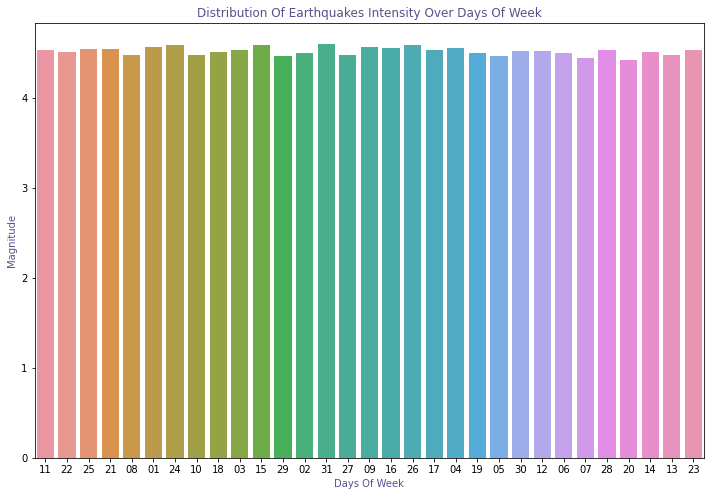

In [25]:
# #Evauating earthquake in terms of days of week
# plt.figure(figsize=(12,8))
# Days_of_week=sns.barplot(x=final_earthquake_df['Day'],y="Magnitude",data=final_earthquake_df, ci =None)
# Days_of_week.set_title("Distribution Of Earthquakes Intensity Over Days Of Week", color="#58508d")
# Days_of_week.set_ylabel("Magnitude", color="#58508d")
# Days_of_week.set_xlabel("Days Of Week", color="#58508d")

In [26]:
#Exports DataFrame as a csv file
final_earthquake_df.to_csv('earthquake.csv', index= False)

In [27]:
# Filter data between two dates
filtered_1857 = final_earthquake_df.loc[(final_earthquake_df['Year'] >= '1827')
                     & (final_earthquake_df['Year'] <='1857')]
# Display

filtered_1857 = filtered_1857.sort_values(by=['Year','Month','Day'], ascending=[True, True,True])
filtered_1857.head(5)

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
5198,"Channel Islands region, California",6.0,NaN,NaN,34.00,-119.00,04:00:00,1827,09,24
5197,"Near San Juan Bautista, California",6.0,NaN,NaN,35.35,-120.65,00:00:00,1830,01,01
5196,"Near San Juan Bautista, California",6.4,NaN,NaN,36.90,-121.50,15:30:00,1836,06,10
5195,"The 1838 San Andreas Fault Earthquake, California",7.4,NaN,NaN,37.30,-122.15,20:00:00,1838,06,25
5194,"Near San Juan Bautista, California",6.5,NaN,NaN,36.85,-121.50,00:00:00,1840,01,18


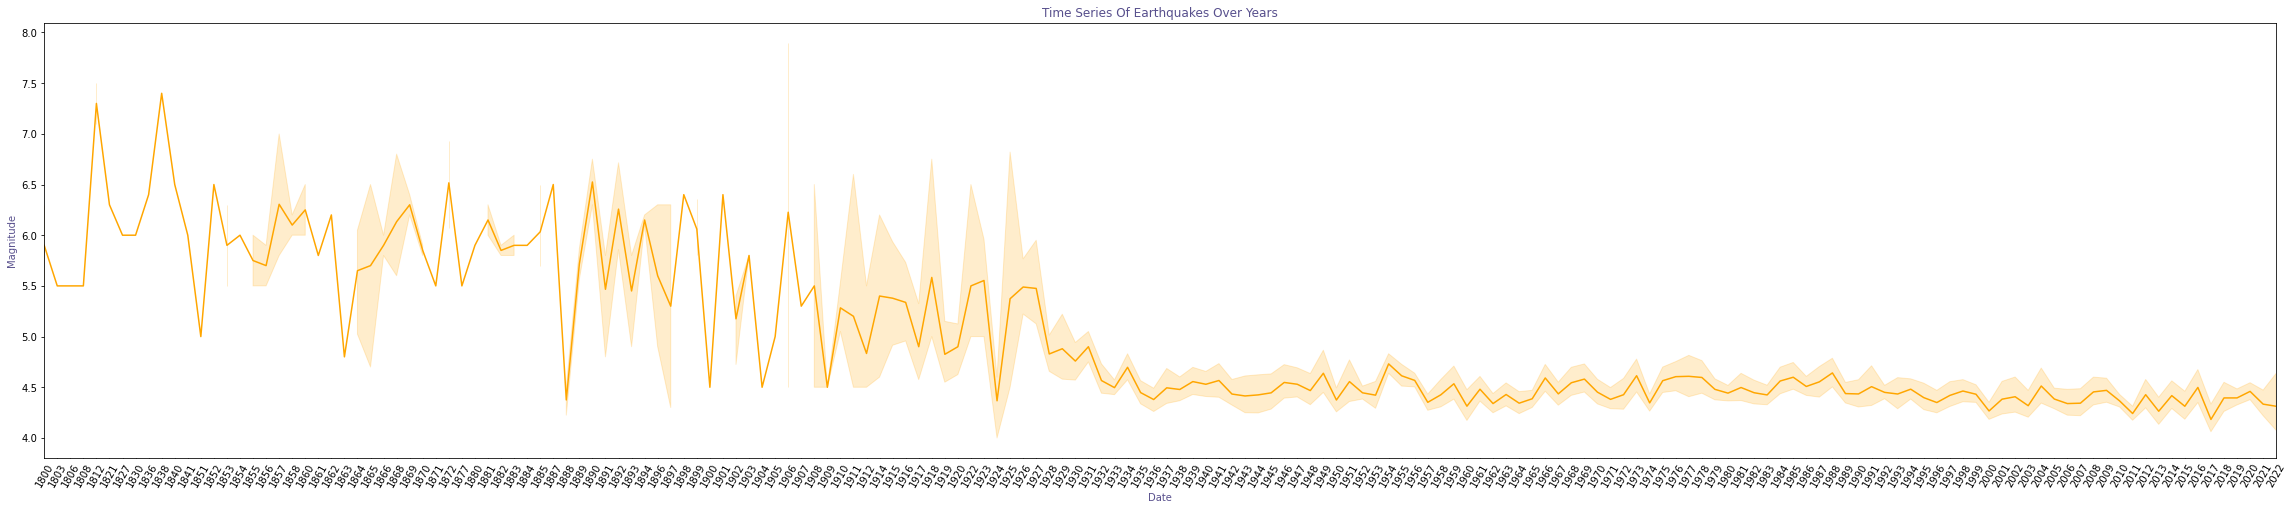

In [43]:

#plotting a lineplot with magnitudes with respect to dates

# Apply the default theme

plot = plt.figure(figsize=(40,8))
time_series=sns.lineplot(x= final_earthquake_df['Year'],y="Magnitude",data=final_earthquake_df, color="#ffa600")
time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
time_series.set_ylabel("Magnitude", color="#58508d") 
time_series.set_xlabel("Date", color="#58508d")
plt.xticks(rotation=60) 
plt.margins(x=0)
            
time_series.tick_params(axis = 'x', which = 'major', length = 0.5)
time_series.tick_params(axis = 'x', which = 'minor', length = 0.5)


In [44]:
# Use google maps api
gmaps.configure(api_key=g_key) # Fill in with your API key
#Get the locations from the data set
locations = filtered_1857[["Latitude", "Longitude"]]
#Get the magnitude from the data
weights = filtered_1857['Magnitude']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
# Filter data between two dates
filtered_1906 = final_earthquake_df.loc[(final_earthquake_df['Year'] > '1876')
                     & (final_earthquake_df['Year'] <= '1906')]

filtered_1906 = filtered_1906.sort_values(by=['Year','Month','Day'], ascending=[True, True,True])
filtered_1906.head(5)

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
5146,"Lake Tahoe area, California-Nevada border",5.5,NaN,NaN,39.00,-120.00,07:10:00,1877,07,10
5145,"Near San Bernardino, California",5.9,NaN,NaN,34.00,-117.00,23:35:00,1880,12,19
5144,"Northwest of Parkfield, California",6.0,NaN,NaN,36.05,-120.55,00:11:00,1881,02,02
5143,"Southwest of Modesto, California",6.3,NaN,NaN,37.30,-121.30,10:00:00,1881,04,10
5142,"Southeast of Hollister, California",5.9,NaN,NaN,36.50,-121.10,21:45:00,1882,03,06


In [46]:
# Use google maps api
gmaps.configure(api_key=g_key) # Fill in with your API key

#Get the locations from the data set
locations = filtered_1906[["Latitude", "Longitude"]]
#Get the magnitude from the data
weights = filtered_1906['Magnitude']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

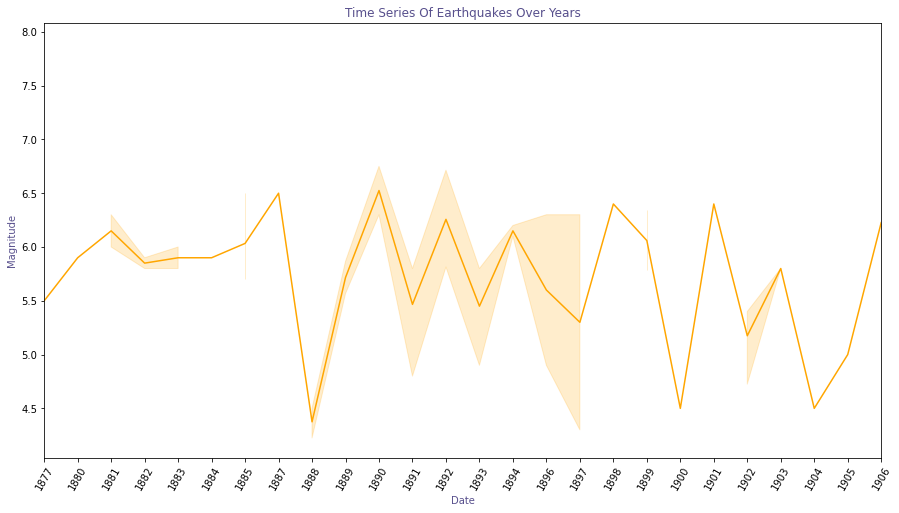

In [48]:
#plotting a lineplot with magnitudes with respectto dates

# Apply the default theme

plot = plt.figure(figsize=(15,8))
Time_series=sns.lineplot(x= filtered_1906['Year'],y="Magnitude",data=filtered_1906, color="#ffa600")
Time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
Time_series.set_ylabel("Magnitude", color="#58508d")
Time_series.set_xlabel("Date", color="#58508d")

plt.xticks(rotation=60) 
plt.margins(x=0)


In [106]:
# Filter data between two dates
filtered_2022 = final_earthquake_df.loc[(final_earthquake_df['Year'] > '1992')
                     & (final_earthquake_df['Year'] <= '2022')]

filtered_2022 = filtered_2022.sort_values(by=['Year','Month','Day'], ascending=[True, True,True])
filtered_2022.head(5)

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
892,"2 km WSW of Ridgemark, California",4.30,5.20,1.0,36.806000,-121.389833,22:29:26,2003,01,07
891,"20km NE of Arvin, CA",4.54,5.20,3.8,35.317500,-118.653833,09:16:10,2003,01,25
889,"4 km SE of San Ramon, California",4.00,3.81,4.2,37.748167,-121.942333,18:47:38,2003,02,02
890,"4 km N of Dublin, California",4.00,3.74,4.3,37.742500,-121.937333,18:22:58,2003,02,02
888,"74km SSW of Alberto Oviedo Mota, B.C., MX",4.99,5.90,4.3,31.628167,-115.510667,10:34:04,2003,02,07


Text(0.5, 0, 'Date')

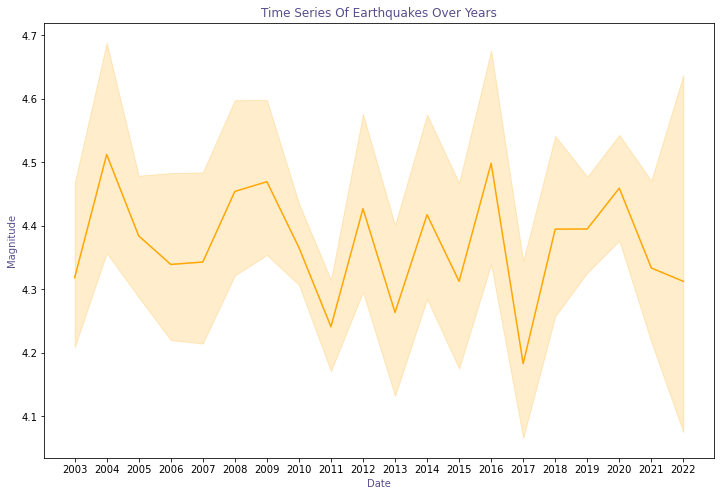

In [107]:
plot = plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x= filtered_2022['Year'],y="Magnitude",data=filtered_2022, color="#ffa600")
Time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
Time_series.set_ylabel("Magnitude", color="#58508d")
Time_series.set_xlabel("Date", color="#58508d")

In [45]:
# Use google maps api
gmaps.configure(api_key=g_key) # Fill in with your API key

#Get the locations from the data set
locations = filtered_2022[["Latitude", "Longitude"]]
#Get the magnitude from the data
weights = filtered_2022['Magnitude']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
from branca.element import Figure
fig=Figure(width=550,height=350)

map =folium.Map(location=[35.1361, -119.6756])
map

fig2= Figure(width=550,height=350)
m2=folium.Map(location=[35.1361, -119.6756])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2

In [47]:
coords_1= [(39.914, -124.163),
(39.439, -123.890),
(38.997, -123.597),
(38.541,-123.305),
(37.874, -122.696),
(37.527, -122.380),
(37.205, -122.005),
(36.698, -121.305),
(36.338, -120.897),
(35.910, -120.438),
(35.450, -119.936),
(34.981, -119.329),
(34.837, -118.912),
(34.658, -118.400),
(34.564, -118.072),
(34.441, -117.746),
(34.350, -117.507),
(34.181, -117.159),
(34.042, -116.660),
(33.771, -116.209),
(33.421, -115.773),
(33.421, -115.773),
(33.237, -115.596)]



fig5=Figure(height=550,width=750)
m5=folium.Map(location=[35.1361, -119.6756],tiles='cartodbpositron',zoom_start=5)
fig5.add_child(m5)


# Creating feature groups
f1=folium.FeatureGroup("Fault Line")


# Adding lines to the different feature groups
line_1=folium.vector_layers.PolyLine(coords_1,popup='<b>San Andreas Fault Line1</b>',color='red',weight=2).add_to(f1)

f1.add_to(m5)

folium.LayerControl().add_to(m5)
m5
